In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/content/Bank_data.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


# **Обработка данных**

In [3]:
data.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,909
Balance,0
NumOfProducts,0


In [4]:
#заполним пропуски в Tenure медианными значениями
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())

data.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [5]:
data.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,float64
Balance,float64
NumOfProducts,int64


In [6]:
#удалим колонки RowNumber, Surname, CustomerId, тк они не несут никакой информации для модели
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [7]:
#закодируем one-hot-encoding колонки 'Geography', 'Gender'
categ_cols = ['Geography', 'Gender']
data = pd.get_dummies(data, columns=categ_cols, drop_first=True)

In [8]:
#заскелим остальные числовые признаки
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()

data[num_cols] = scaler.fit_transform(data[num_cols])

In [9]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.086246,-1.225848,-0.911583,1,1,0.021886,1,False,False,False
1,-0.440036,0.198164,-1.448581,0.117350,-0.911583,0,1,0.216534,0,False,True,False
2,-1.536794,0.293517,1.087768,1.333053,2.527057,1,0,0.240687,1,False,False,False
3,0.501521,0.007457,-1.448581,-1.225848,0.807737,0,0,-0.108918,0,False,False,False
4,2.063884,0.388871,-1.086246,0.785728,-0.911583,1,1,-0.365276,0,False,True,False


In [10]:
#заменим True/False на 0,1
for col in data.columns:
    if data[col].dtype == 'bool':
        data[col] = data[col].astype(int)

data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.086246,-1.225848,-0.911583,1,1,0.021886,1,0,0,0
1,-0.440036,0.198164,-1.448581,0.117350,-0.911583,0,1,0.216534,0,0,1,0
2,-1.536794,0.293517,1.087768,1.333053,2.527057,1,0,0.240687,1,0,0,0
3,0.501521,0.007457,-1.448581,-1.225848,0.807737,0,0,-0.108918,0,0,0,0
4,2.063884,0.388871,-1.086246,0.785728,-0.911583,1,1,-0.365276,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,0.000761,-1.225848,0.807737,1,0,-0.066419,0,0,0,1
9996,-1.391939,-0.373958,1.812439,-0.306379,-0.911583,1,1,0.027988,0,0,0,1
9997,0.604988,-0.278604,0.725432,-1.225848,-0.911583,0,1,-1.008643,1,0,0,0
9998,1.256835,0.293517,-0.723910,-0.022608,0.807737,1,0,-0.125231,1,1,0,1


# **Подготовка данных**

In [11]:
#разделим данные на трейн и тест так, чтобы распределение таргета в тесте было примерно таким же как и в трейне
from sklearn.model_selection import train_test_split

y = data['Exited']
X = data.drop(columns=['Exited'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

var_train = np.var(y_train)
var_test = np.var(y_test)

print(f"Дисперсия в train: {var_train:.6f}")
print(f"Дисперсия в test : {var_test:.6f}")


Дисперсия в train: 0.162236
Дисперсия в test : 0.162088


/tmp/ipython-input-3252701990.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="Blues", ax=axes[0])
/tmp/ipython-input-3252701990.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette="Greens", ax=axes[1])


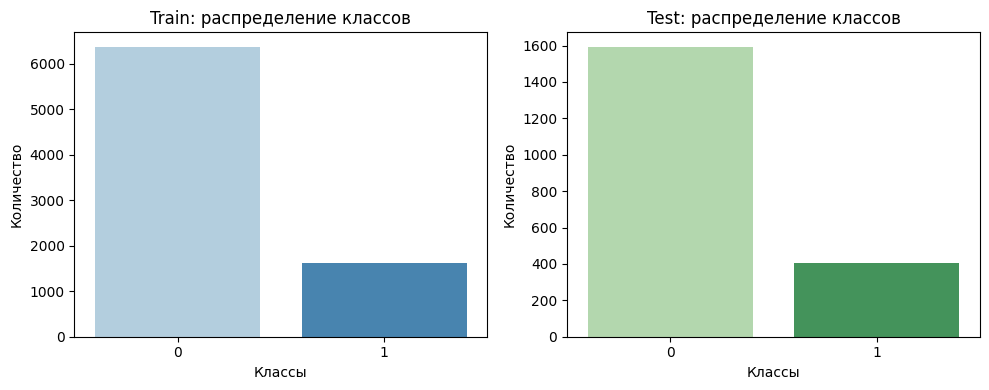

In [12]:
#Визуализация распределения классов в трейне и в тесте
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.countplot(x=y_train, palette="Blues", ax=axes[0])
axes[0].set_title("Train: распределение классов")
axes[0].set_xlabel("Классы")
axes[0].set_ylabel("Количество")

sns.countplot(x=y_test, palette="Greens", ax=axes[1])
axes[1].set_title("Test: распределение классов")
axes[1].set_xlabel("Классы")
axes[1].set_ylabel("Количество")

plt.tight_layout()
plt.show()

In [13]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 10.4 MB/s eta 0:00:00


# **Logistic Regression**

F1 на тесте: 0.287
ROC AUC на тесте: 0.775


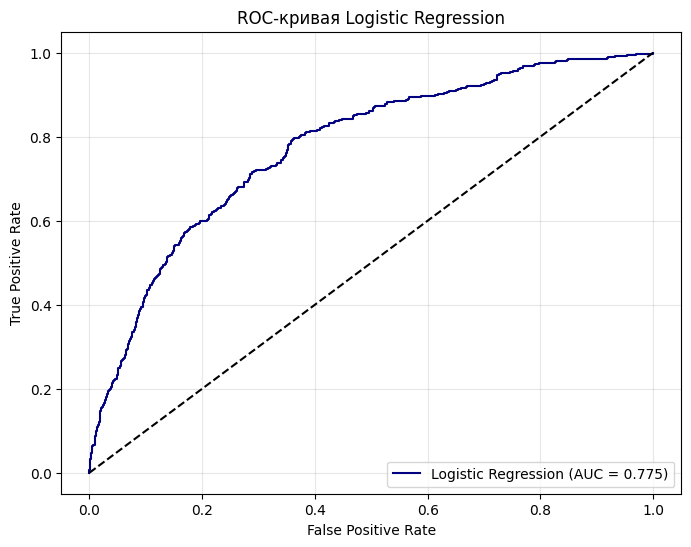

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Базовая модель без учета дисбаланса
baseline_model = LogisticRegression(random_state=42, max_iter=1000)
baseline_model.fit(X_train, y_train)

y_pred_base = baseline_model.predict(X_test)
y_proba_base = baseline_model.predict_proba(X_test)[:, 1]

f1 = f1_score(y_test, y_pred_base)
roc_auc = roc_auc_score(y_test, y_proba_base)

print(f"F1 на тесте: {f1:.3f}")
print(f"ROC AUC на тесте: {roc_auc:.3f}")

fpr, tpr, _ = roc_curve(y_test, y_proba_base)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.3f})', color='navy')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая Logistic Regression')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


# **XGBoost**

In [19]:
import optuna
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score

f1_scorer = make_scorer(f1_score, pos_label=1)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 10.0),
        'random_state': 42,
        'n_jobs': -1,
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }

    model = xgb.XGBClassifier(**params)

    f1_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=f1_scorer, n_jobs=-1)

    return -f1_scores.mean()


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Лучшие параметры для XGBoost:", study.best_params)

[I 2025-10-11 07:17:47,545] A new study created in memory with name: no-name-8d1d030f-e490-420f-b3c6-0537bf55eda8
[I 2025-10-11 07:17:54,160] Trial 0 finished with value: -0.5768652568701016 and parameters: {'n_estimators': 704, 'max_depth': 5, 'learning_rate': 0.2238199123346211, 'subsample': 0.8058719113427459, 'colsample_bytree': 0.95201582861775, 'scale_pos_weight': 9.793557707363938}. Best is trial 0 with value: -0.5768652568701016.
[I 2025-10-11 07:17:58,152] Trial 1 finished with value: -0.5657837959453144 and parameters: {'n_estimators': 501, 'max_depth': 3, 'learning_rate': 0.042184451511714495, 'subsample': 0.6147323685439132, 'colsample_bytree': 0.7240047704122683, 'scale_pos_weight': 6.710406429463143}. Best is trial 0 with value: -0.5768652568701016.
[I 2025-10-11 07:18:00,889] Trial 2 finished with value: -0.5680693685163656 and parameters: {'n_estimators': 774, 'max_depth': 3, 'learning_rate': 0.02653403261762782, 'subsample': 0.8393554341691245, 'colsample_bytree': 0.88

Лучшие параметры для XGBoost: {'n_estimators': 438, 'max_depth': 4, 'learning_rate': 0.02347058341649369, 'subsample': 0.601187601141207, 'colsample_bytree': 0.7326284188892398, 'scale_pos_weight': 2.464645072797476}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:21:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


F1 на тесте: 0.622
ROC AUC на тесте: 0.866


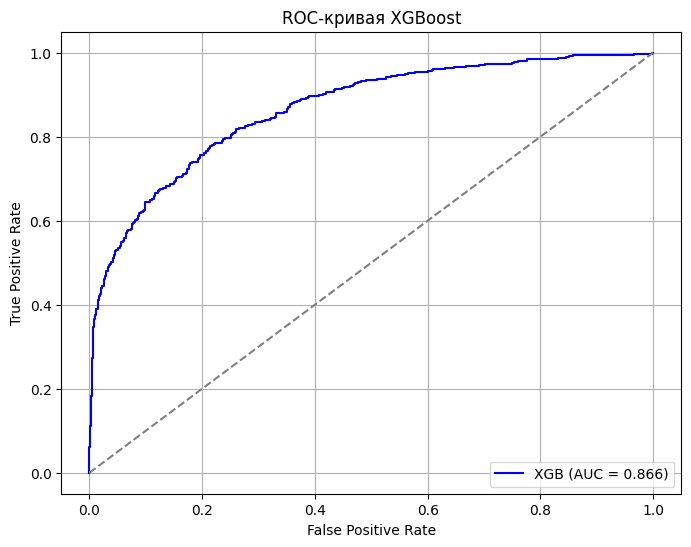

In [20]:
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

#для балансирования применяем Oversampling через SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

best_params = study.best_params
best_params.update({
    'random_state': 42,
    'n_jobs': -1,
    'use_label_encoder': False,
    'eval_metric': 'logloss'
})

best_params.pop('scale_pos_weight', None)

model = xgb.XGBClassifier(**best_params)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"F1 на тесте: {f1:.3f}")
print(f"ROC AUC на тесте: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"XGB (AUC = {roc_auc:.3f})", color='blue')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая XGBoost")
plt.legend(loc="lower right")
plt.grid()
plt.show()


# **LightGBM**

In [21]:
import lightgbm as lgb
import optuna
from sklearn.model_selection import KFold, cross_val_score

X_lgb = X.copy()
y_array = y.values

def objective_lgb(trial):
    params = {
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'scale_pos_weight': y_train.value_counts()[0] / y_train.value_counts()[1],
        'random_state': 42,
        'n_jobs': -1
    }

    model = lgb.LGBMClassifier(**params)
    cv = KFold(n_splits=5, shuffle=True, random_state=42)


    scores = cross_val_score(model, X_lgb, y_array, cv=cv, scoring='f1', n_jobs=-1)

    return -scores.mean()


study_lgb = optuna.create_study(direction='minimize')
study_lgb.optimize(objective_lgb, n_trials=50)

print("Лучшие параметры LightGBM:", study_lgb.best_params)

[I 2025-10-11 07:23:15,931] A new study created in memory with name: no-name-19bcb7fe-df81-4ebe-be91-60fa08ea3b1f
[I 2025-10-11 07:23:56,487] Trial 0 finished with value: -0.607631695747066 and parameters: {'n_estimators': 878, 'learning_rate': 0.021384981029812757, 'num_leaves': 111, 'max_depth': 8, 'subsample': 0.8012830604894838, 'colsample_bytree': 0.9414257714855493, 'reg_alpha': 1.14699498084126, 'reg_lambda': 2.4151540438876684}. Best is trial 0 with value: -0.607631695747066.
[I 2025-10-11 07:24:25,942] Trial 1 finished with value: -0.5988624641825029 and parameters: {'n_estimators': 610, 'learning_rate': 0.0860379077109772, 'num_leaves': 139, 'max_depth': 14, 'subsample': 0.8450400559002917, 'colsample_bytree': 0.9582056865819695, 'reg_alpha': 3.056602700895861, 'reg_lambda': 3.072818345197799}. Best is trial 0 with value: -0.607631695747066.
[I 2025-10-11 07:24:36,239] Trial 2 finished with value: -0.5954768427607313 and parameters: {'n_estimators': 527, 'learning_rate': 0.24

Лучшие параметры LightGBM: {'n_estimators': 197, 'learning_rate': 0.02840112719526129, 'num_leaves': 136, 'max_depth': 11, 'subsample': 0.9558219835919515, 'colsample_bytree': 0.5562468951611205, 'reg_alpha': 0.029795381587537556, 'reg_lambda': 1.2309096280675251}


[LightGBM] [Info] Number of positive: 1630, number of negative: 1630
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018811 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 855
[LightGBM] [Info] Number of data points in the train set: 3260, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

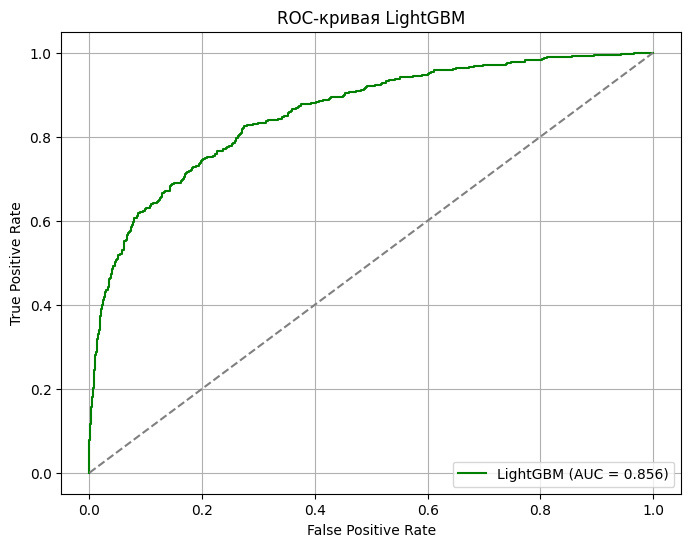

In [22]:
import lightgbm as lgb
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

#для балансирования применяем Undersampling
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

best_params_lgb = study_lgb.best_params
best_params_lgb.update({
    'objective': 'binary',
    'random_state': 42,
    'n_jobs': -1
})

model_lgb = lgb.LGBMClassifier(**best_params_lgb)
model_lgb.fit(X_train_res, y_train_res)

y_pred = model_lgb.predict(X_test)
y_pred_proba = model_lgb.predict_proba(X_test)[:, 1]

f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"F1 на тесте: {f1:.3f}")
print(f"ROC AUC на тесте: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"LightGBM (AUC = {roc_auc:.3f})", color='green')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая LightGBM")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# **CatBoost**

In [18]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.0 MB/s eta 0:00:00


In [19]:
from catboost import CatBoostClassifier
import optuna
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Преобразуем целевую переменную
y_array = y_train.values

def objective_cat(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'random_strength': trial.suggest_float('random_strength', 0.0, 2.0),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'verbose': 0,
        'random_state': 42,
        'scale_pos_weight': y_train.value_counts()[0] / y_train.value_counts()[1]
    }

    model = CatBoostClassifier(**params)
    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    # Используем F1 как метрику
    f1_scores = cross_val_score(model, X_train, y_array, cv=cv, scoring='f1', n_jobs=-1)
    return -f1_scores.mean()  # минимизируем отрицательное F1

# Создаем исследование Optuna
study_cat = optuna.create_study(direction='minimize')
study_cat.optimize(objective_cat, n_trials=50)  # можно увеличить до 100 для лучшего подбора

print("Лучшие параметры CatBoost:", study_cat.best_params)


[I 2025-10-10 13:30:44,799] A new study created in memory with name: no-name-af2fa102-232a-4c3e-bc9c-a89adf0f3a41
[I 2025-10-10 13:31:13,708] Trial 0 finished with value: -0.595333996751604 and parameters: {'iterations': 813, 'depth': 5, 'learning_rate': 0.16030440876040392, 'l2_leaf_reg': 3.4617258090767127, 'random_strength': 1.6398918138467733, 'border_count': 46}. Best is trial 0 with value: -0.595333996751604.
[I 2025-10-10 13:31:31,519] Trial 1 finished with value: -0.6122232434728627 and parameters: {'iterations': 722, 'depth': 8, 'learning_rate': 0.015076972766117218, 'l2_leaf_reg': 5.356987541923179, 'random_strength': 0.860019095580278, 'border_count': 38}. Best is trial 1 with value: -0.6122232434728627.
[I 2025-10-10 13:31:40,822] Trial 2 finished with value: -0.5937014420420541 and parameters: {'iterations': 278, 'depth': 7, 'learning_rate': 0.23083930540002667, 'l2_leaf_reg': 5.128566945040283, 'random_strength': 1.3712277598433975, 'border_count': 241}. Best is trial 1 w

Лучшие параметры CatBoost: {'iterations': 898, 'depth': 7, 'learning_rate': 0.014263590529006732, 'l2_leaf_reg': 4.832389742702041, 'random_strength': 1.5222792843325423, 'border_count': 255}


F1 на тесте: 0.619
ROC AUC на тесте: 0.870


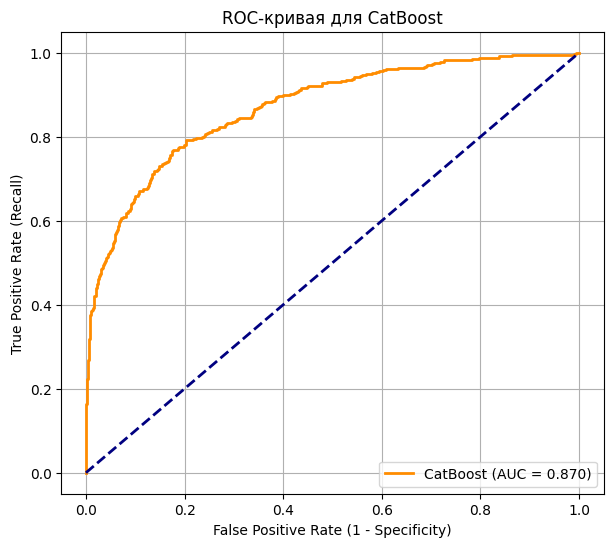

In [22]:
from sklearn.metrics import roc_curve, auc

#для балансироки применяем class weighting

best_params_cat = study_cat.best_params
best_params_cat.update({'random_state': 42, 'verbose': 0,
                        'scale_pos_weight': y_train.value_counts()[0] / y_train.value_counts()[1]})

model_cat = CatBoostClassifier(**best_params_cat)
model_cat.fit(X_train, y_train)

from sklearn.metrics import f1_score, roc_auc_score

y_pred = model_cat.predict(X_test)
y_proba = model_cat.predict_proba(X_test)[:,1]

print(f"F1 на тесте: {f1_score(y_test, y_pred):.3f}")
print(f"ROC AUC на тесте: {roc_auc_score(y_test, y_proba):.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'CatBoost (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC-кривая для CatBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# **Вывод**

**Вывод по лабораторной работе**

**Цель:** Построить классификатор для прогнозирования ухода клиентов из банка, добиться F1 ≥ 0.59 на тестовом наборе, а также оценить качество по ROC AUC.

**Работа с данными:**

1) Изучены типы и формат данных.

2) Проведена очистка: удалены неинформативные идентификаторы (RowNumber, CustomerId, Surname), проверены пропуски (обнаружено 909 пропусков в Tenure), аномалии не выявлены.

3) Кодированы категориальные признаки (Geography, Gender) с помощью One-Hot Encoding.

4) Проведен анализ распределения целевой переменной: дисбаланс между классами (клиенты, покидающие банк, составляют меньшинство).

**Обучение и оценка моделей:**

Модель	 Балансировка классов	F1 на тесте	ROC AUC на тесте

**XGBoost**	  Oversampling	0.622	0.866

**LightGBM**	Undersampling	0.577	0.856

**CatBoost**	Class weighting (scale_pos_weight)	0.619	0.870

**Baseline (логистическая регрессия)**	Нет	0.287	0.775


**Анализ:**

1) Все три модели (XGBoost, LightGBM, CatBoost) значительно превосходят базовую модель.

2) Лучшее сочетание F1 и ROC AUC показал XGBoost с oversampling — F1 = 0.622, ROC AUC = 0.866.

3) CatBoost с class weighting показал почти такой же результат по F1 (0.619), но немного выше ROC AUC (0.870).

4) LightGBM с undersampling показал чуть более низкую F1, но всё равно значительно выше базовой модели.

**Выводы и рекомендации:**

1) Использование методов балансировки классов критично при работе с дисбалансным таргетом.

2) Подбор гиперпараметров с помощью Optuna позволил повысить точность моделей.

3) Для практического применения рекомендована модель XGBoost с oversampling, так как она показала наилучшее сочетание F1 и ROC AUC. CatBoost можно рассматривать как альтернативу с немного лучшей ROC AUC.

4) Модель можно интегрировать в бизнес-процессы банка для прогнозирования ухода клиентов и проактивного удержания наиболее ценных клиентов.